In [2]:
from pathlib import Path
import sys
import pandas as pd
import matplotlib as plt

# Paths
NOTEBOOK_DIR = Path.cwd()
PROJECT_ROOT = NOTEBOOK_DIR.parent
SRC_DIR = PROJECT_ROOT / "src"

if str(SRC_DIR) not in sys.path:
    sys.path.append(str(SRC_DIR))

from spotify_auth import get_spotify_client
from liked_songs import fetch_all_liked_tracks, flatten_liked_tracks

# Authenticate & fetch liked songs
sp = get_spotify_client(scopes="user-library-read")
liked_raw = fetch_all_liked_tracks(sp, limit=50, max_tracks=None, verbose=False)

# Flatten into DataFrame
flat_records = flatten_liked_tracks(liked_raw)
df = pd.DataFrame(flat_records)

In [3]:
df.head()

,added_at,added_at_datetime,track_id,track_name,track_popularity,explicit,duration_ms,duration_min,track_number,disc_number,...,album_release_datetime,album_total_tracks,artist_names,artist_ids,primary_artist_name,primary_artist_id,is_local,preview_url,spotify_url,uri
0,2025-11-09T19:42:07Z,2025-11-09 19:42:07+00:00,53iuhJlwXhSER5J2IYYv1W,The Fate of Ophelia,100,False,226073,3.767883,1,1,...,2025-10-03,12,[Taylor Swift],[06HL4z0CvFAxyc27GXpf02],Taylor Swift,06HL4z0CvFAxyc27GXpf02,False,None,https://open.spotify.com/track/53iuhJlwXhSER5J...,spotify:track:53iuhJlwXhSER5J2IYYv1W
1,2025-11-08T17:13:21Z,2025-11-08 17:13:21+00:00,54uLTcjNraWuwjqLrDhG23,Try Again,68,False,284640,4.744000,15,1,...,2001-07-07,15,[Aaliyah],[0urTpYCsixqZwgNTkPJOJ4],Aaliyah,0urTpYCsixqZwgNTkPJOJ4,False,None,https://open.spotify.com/track/54uLTcjNraWuwjq...,spotify:track:54uLTcjNraWuwjqLrDhG23
2,2025-11-07T13:55:03Z,2025-11-07 13:55:03+00:00,47lPVbZUh9547oTjx6J4ZV,Professor X,66,True,217704,3.628400,1,1,...,2019-09-13,1,[Dave],[6Ip8FS7vWT1uKkJSweANQK],Dave,6Ip8FS7vWT1uKkJSweANQK,False,None,https://open.spotify.com/track/47lPVbZUh9547oT...,spotify:track:47lPVbZUh9547oTjx6J4ZV
3,2025-11-02T15:16:13Z,2025-11-02 15:16:13+00:00,1xzi1Jcr7mEi9K2RfzLOqS,CUFF IT,74,True,225388,3.756467,4,1,...,2022-07-29,16,[Beyoncé],[6vWDO969PvNqNYHIOW5v0m],Beyoncé,6vWDO969PvNqNYHIOW5v0m,False,None,https://open.spotify.com/track/1xzi1Jcr7mEi9K2...,spotify:track:1xzi1Jcr7mEi9K2RfzLOqS
4,2025-11-02T15:15:28Z,2025-11-02 15:15:28+00:00,0DlVOdK5GJtnom4nI3EOz5,Soldier (feat. T.I. & Lil' Wayne),56,False,325573,5.426217,2,1,...,2004-01-01,12,"[Destiny's Child, T.I., Lil Wayne]","[1Y8cdNmUJH7yBTd9yOvr5i, 4OBJLual30L7gRl5UkeRc...",Destiny's Child,1Y8cdNmUJH7yBTd9yOvr5i,False,None,https://open.spotify.com/track/0DlVOdK5GJtnom4...,spotify:track:0DlVOdK5GJtnom4nI3EOz5


In [12]:
df.describe()

,track_popularity,duration_ms,duration_min,track_number,disc_number,album_release_datetime,album_total_tracks
count,2569.000000,2569.000000,2569.000000,2569.000000,2569.000000,2569,2569.000000
mean,60.356948,226339.559362,3.772326,5.517322,1.016349,2011-12-15 10:53:34.636045056,13.501362
min,0.000000,38333.000000,0.638883,1.000000,1.000000,1957-01-01 00:00:00,1.000000
25%,55.000000,188013.000000,3.133550,1.000000,1.000000,2007-12-03 00:00:00,10.000000
50%,67.000000,219724.000000,3.662067,4.000000,1.000000,2015-04-14 00:00:00,14.000000
75%,76.000000,255586.000000,4.259767,8.000000,1.000000,2019-09-06 00:00:00,17.000000
max,100.000000,760973.000000,12.682883,51.000000,3.000000,2025-10-03 00:00:00,104.000000
std,23.849522,66937.709233,1.115628,4.847739,0.129871,NaN,8.081512


In [13]:
# Identify duplicates by (track_name, primary_artist_name)
dup_cols = ["track_name", "primary_artist_name"]

duplicates = (
    df[df.duplicated(subset=dup_cols, keep=False)]
    .sort_values(dup_cols)
)

print("Number of duplicated SONG entries (same title + artist):", duplicates.shape[0])

duplicates.head(20)


Number of duplicated SONG entries (same title + artist): 351


,added_at,added_at_datetime,track_id,track_name,track_popularity,explicit,duration_ms,duration_min,track_number,disc_number,...,album_release_datetime,album_total_tracks,artist_names,artist_ids,primary_artist_name,primary_artist_id,is_local,preview_url,spotify_url,uri
708,2023-10-30T23:57:34Z,2023-10-30 23:57:34+00:00,5cc9Zbfp9u10sfJeKZ3h16,3005,5,True,234215,3.903583,9,1,...,2013-12-10,19,[Childish Gambino],[73sIBHcqh3Z3NyqHKZ7FOL],Childish Gambino,73sIBHcqh3Z3NyqHKZ7FOL,False,None,https://open.spotify.com/track/5cc9Zbfp9u10sfJ...,spotify:track:5cc9Zbfp9u10sfJeKZ3h16
1716,2021-08-03T12:14:44Z,2021-08-03 12:14:44+00:00,2ZltjIqztEpZtafc8w0I9t,3005,2,True,234215,3.903583,9,1,...,2013-12-10,19,[Childish Gambino],[73sIBHcqh3Z3NyqHKZ7FOL],Childish Gambino,73sIBHcqh3Z3NyqHKZ7FOL,False,None,https://open.spotify.com/track/2ZltjIqztEpZtaf...,spotify:track:2ZltjIqztEpZtafc8w0I9t
2076,2021-01-24T19:08:56Z,2021-01-24 19:08:56+00:00,6nzhhT57iQYrbqumru9NNP,ABC,0,False,179973,2.999550,2,1,...,1995-01-01,21,[The Jackson 5],[2iE18Oxc8YSumAU232n4rW],The Jackson 5,2iE18Oxc8YSumAU232n4rW,False,None,https://open.spotify.com/track/6nzhhT57iQYrbqu...,spotify:track:6nzhhT57iQYrbqumru9NNP
2087,2021-01-24T12:55:34Z,2021-01-24 12:55:34+00:00,6wDviYDtmSDZ0S6TVMM9Vc,ABC,1,False,177733,2.962217,3,1,...,1970-05-08,12,[The Jackson 5],[2iE18Oxc8YSumAU232n4rW],The Jackson 5,2iE18Oxc8YSumAU232n4rW,False,None,https://open.spotify.com/track/6wDviYDtmSDZ0S6...,spotify:track:6wDviYDtmSDZ0S6TVMM9Vc
1942,2021-02-10T22:30:51Z,2021-02-10 22:30:51+00:00,1QnvpPFP4Q3FHbDchqWiWy,Airplanes (feat. Hayley Williams of Paramore),60,True,180480,3.008000,4,1,...,2010-04-27,15,"[B.o.B, Hayley Williams]","[5ndkK3dpZLKtBklKjxNQwT, 6Rx1JKzBrSzoKQtmbVmBnM]",B.o.B,5ndkK3dpZLKtBklKjxNQwT,False,None,https://open.spotify.com/track/1QnvpPFP4Q3FHbD...,spotify:track:1QnvpPFP4Q3FHbDchqWiWy
2563,2018-11-21T20:24:22Z,2018-11-21 20:24:22+00:00,6lV2MSQmRIkycDScNtrBXO,Airplanes (feat. Hayley Williams of Paramore),78,True,180480,3.008000,4,1,...,2010-04-27,12,"[B.o.B, Hayley Williams]","[5ndkK3dpZLKtBklKjxNQwT, 6Rx1JKzBrSzoKQtmbVmBnM]",B.o.B,5ndkK3dpZLKtBklKjxNQwT,False,None,https://open.spotify.com/track/6lV2MSQmRIkycDS...,spotify:track:6lV2MSQmRIkycDScNtrBXO
1332,2022-01-19T19:24:31Z,2022-01-19 19:24:31+00:00,4VQNCzfZ3MdHEwwErNXpBo,All Eyez On Me (ft. Big Syke),78,True,307773,5.129550,10,2,...,1996-02-13,27,"[2Pac, Big Syke]","[1ZwdS5xdxEREPySFridCfh, 5J32qSlWzKCdcL31B8wglv]",2Pac,1ZwdS5xdxEREPySFridCfh,False,None,https://open.spotify.com/track/4VQNCzfZ3MdHEww...,spotify:track:4VQNCzfZ3MdHEwwErNXpBo
2301,2020-10-20T20:44:22Z,2020-10-20 20:44:22+00:00,5e7ldn9Kwo8Aw9Z8ql9cDj,All Eyez On Me (ft. Big Syke),1,True,307773,5.129550,10,2,...,1996-01-01,27,"[2Pac, Big Syke]","[1ZwdS5xdxEREPySFridCfh, 5J32qSlWzKCdcL31B8wglv]",2Pac,1ZwdS5xdxEREPySFridCfh,False,None,https://open.spotify.com/track/5e7ldn9Kwo8Aw9Z...,spotify:track:5e7ldn9Kwo8Aw9Z8ql9cDj
2200,2020-12-23T13:28:15Z,2020-12-23 13:28:15+00:00,01UniWABhnIka7GgvzOC02,Amazing,41,False,238333,3.972217,4,1,...,2008-11-24,12,"[Kanye West, Jeezy]","[5K4W6rqBFWDnAN6FQUkS6x, 4yBK75WVCQXej1p04GWqxH]",Kanye West,5K4W6rqBFWDnAN6FQUkS6x,False,None,https://open.spotify.com/track/01UniWABhnIka7G...,spotify:track:01UniWABhnIka7GgvzOC02
2212,2020-12-15T19:07:29Z,2020-12-15 19:07:29+00:00,0m3Ze0cy8qBHSsV2exAfCw,Amazing,64,False,238333,3.972217,4,1,...,2008-11-24,12,"[Kanye West, Jeezy]","[5K4W6rqBFWDnAN6FQUkS6x, 4yBK75WVCQXej1p04GWqxH]",Kanye West,5K4W6rqBFWDnAN6FQUkS6x,False,None,https://open.spotify.com/track/0m3Ze0cy8qBHSsV...,spotify:track:0m3Ze0cy8qBHSsV2exAfCw


In [14]:
dup_groups = (
    duplicates
    .groupby(dup_cols)
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
)

dup_groups.head(20)


,track_name,primary_artist_name,count
159,bellyache,Billie Eilish,3
90,Mr. Brightside,The Killers,3
51,Glad You Came,The Wanted,3
46,Earned It (Fifty Shades Of Grey),The Weeknd,3
145,Toosie Slide,Drake,3
155,Wonderwall,Oasis,3
142,There's Nothing Holdin' Me Back,Shawn Mendes,3
4,Amazing,Kanye West,2
0,3005,Childish Gambino,2
1,ABC,The Jackson 5,2


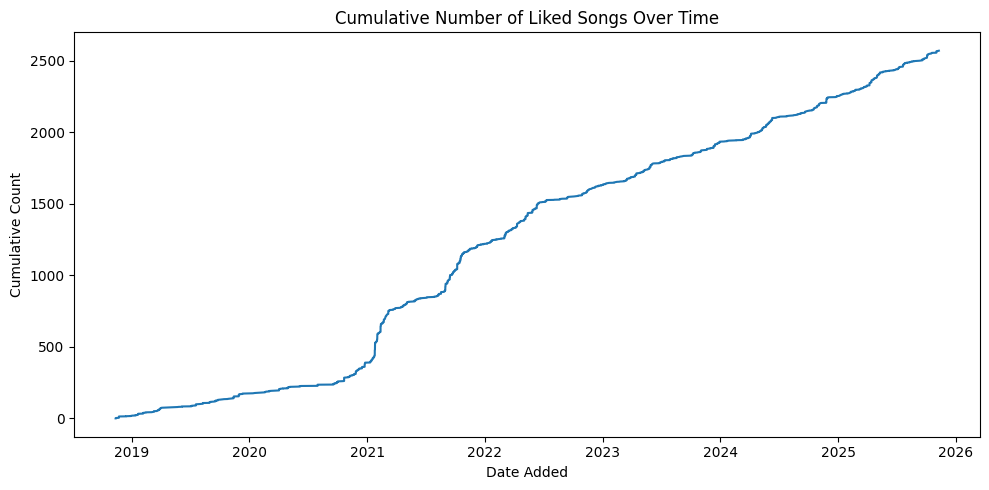

In [15]:
import matplotlib.pyplot as plt

df_sorted = df.sort_values("added_at_datetime").copy()
df_sorted["cumulative_likes"] = range(1, len(df_sorted) + 1)

plt.figure(figsize=(10, 5))
plt.plot(df_sorted["added_at_datetime"], df_sorted["cumulative_likes"])
plt.title("Cumulative Number of Liked Songs Over Time")
plt.xlabel("Date Added")
plt.ylabel("Cumulative Count")
plt.tight_layout()
plt.show()


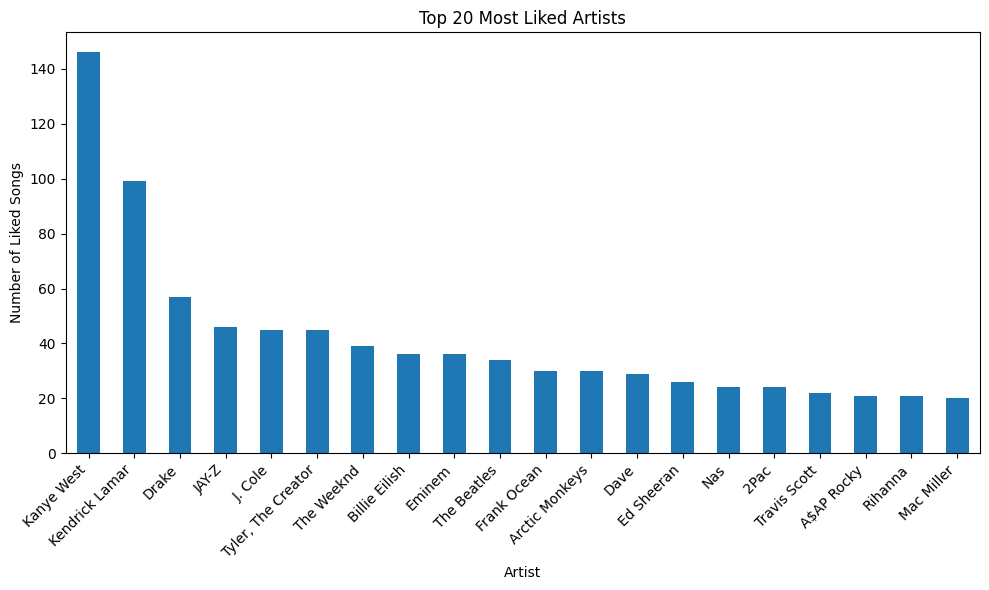

In [16]:
top_artists = (
    df["primary_artist_name"]
    .value_counts()
    .head(20)
)

plt.figure(figsize=(10, 6))
top_artists.plot(kind="bar")
plt.title("Top 20 Most Liked Artists")
plt.xlabel("Artist")
plt.ylabel("Number of Liked Songs")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


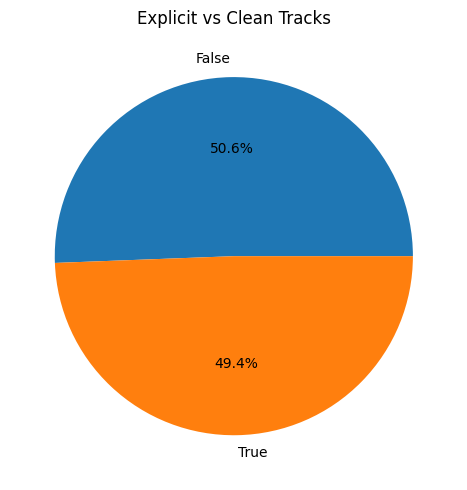

In [17]:
expl_counts = df["explicit"].value_counts()

plt.figure(figsize=(5, 5))
expl_counts.plot(kind="pie", autopct="%1.1f%%")
plt.title("Explicit vs Clean Tracks")
plt.ylabel("")
plt.tight_layout()
plt.show()


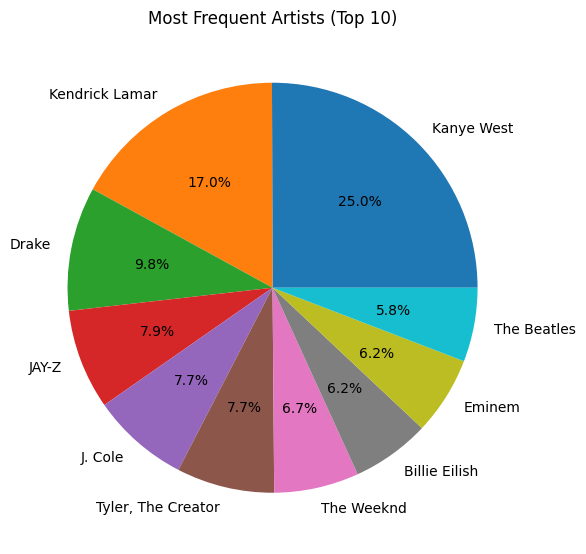

In [19]:
top10 = df["primary_artist_name"].value_counts().head(10)

plt.figure(figsize=(6, 6))
top10.plot(kind="pie", autopct="%1.1f%%")
plt.title("Most Frequent Artists (Top 10)")
plt.ylabel("")
plt.tight_layout()
plt.show()


In [20]:
# Define what "same song" means for deduplication
song_key_cols = ["track_name", "primary_artist_name"]

# Sort by when you added the song (oldest -> newest)
df_sorted = df.sort_values("added_at_datetime").copy()

# Drop later duplicates, keeping the first time you liked that song
df_nodup = (
    df_sorted
    .drop_duplicates(subset=song_key_cols, keep="first")
    .reset_index(drop=True)
)

df_nodup.shape


(2390, 23)

In [22]:
import math
from typing import List, Dict, Any
import pandas as pd

# Make sure we only query unique track_ids
track_ids: List[str] = (
    df_nodup["track_id"]
    .dropna()
    .drop_duplicates()
    .tolist()
)

len(track_ids)


2390

In [24]:
# Define what counts as the "same song"
song_key_cols = ["track_name", "primary_artist_name"]

# Sort by when the song was first liked
df_sorted = df.sort_values("added_at_datetime").copy()

# Keep the first time you liked each song (title + primary artist)
df_nodup = (
    df_sorted
    .drop_duplicates(subset=song_key_cols, keep="first")
    .reset_index(drop=True)
)

df_nodup.shape, df.shape


((2390, 23), (2569, 23))

In [25]:
df_by_trackid = df.drop_duplicates(subset=["track_id"]).reset_index(drop=True)
df_by_trackid.shape


(2569, 23)

In [26]:
from spotipy.exceptions import SpotifyException

# Fresh client just for audio features (same scopes as before)
sp_af = get_spotify_client(scopes="user-library-read")

# Sanity check – this should print your user name without error
_ = sp_af.current_user()


In [27]:
import math
from typing import List, Dict, Any

track_ids: List[str] = (
    df["track_id"]
    .dropna()
    .drop_duplicates()
    .tolist()
)

len(track_ids)


2569

In [31]:
# Start from your liked_df (the full one)
df = df.copy()

# Build a case-insensitive “song key” = title + primary artist
df["song_key"] = (
    df["track_name"].str.casefold().str.strip()
    + " — "
    + df["primary_artist_name"].str.casefold().str.strip()
)

# Sort so the *earliest added* version is kept (or change to sort by popularity, etc.)
df = df.sort_values("added_at_datetime")

# Drop duplicates by song_key, keeping first
liked_unique = (
    df.drop_duplicates(subset="song_key", keep="first")
      .drop(columns="song_key")
      .reset_index(drop=True)
)

print(f"Original rows: {len(df)}")
print(f"Unique songs (by title + primary artist): {len(liked_unique)}")
liked_unique.head()


Original rows: 2569
Unique songs (by title + primary artist): 2389


,added_at,added_at_datetime,track_id,track_name,track_popularity,explicit,duration_ms,duration_min,track_number,disc_number,...,album_release_datetime,album_total_tracks,artist_names,artist_ids,primary_artist_name,primary_artist_id,is_local,preview_url,spotify_url,uri
0,2018-11-11T10:17:23Z,2018-11-11 10:17:23+00:00,0JP9xo3adEtGSdUEISiszL,Moonlight,82,True,135090,2.251500,3,1,...,2018-03-16,18,[XXXTENTACION],[15UsOTVnJzReFVN1VCnxy4],XXXTENTACION,15UsOTVnJzReFVN1VCnxy4,False,None,https://open.spotify.com/track/0JP9xo3adEtGSdU...,spotify:track:0JP9xo3adEtGSdUEISiszL
1,2018-11-11T10:17:25Z,2018-11-11 10:17:25+00:00,5KL4iZkCTZyXl7KnHgfVDj,"You Need Me, I Don't Need You",59,True,220413,3.673550,10,1,...,2011-09-09,16,[Ed Sheeran],[6eUKZXaKkcviH0Ku9w2n3V],Ed Sheeran,6eUKZXaKkcviH0Ku9w2n3V,False,None,https://open.spotify.com/track/5KL4iZkCTZyXl7K...,spotify:track:5KL4iZkCTZyXl7KnHgfVDj
2,2018-11-11T21:00:26Z,2018-11-11 21:00:26+00:00,6gLTlewjPtazYnOa9I5Bno,Moves (feat. Snoop Dogg),0,False,165106,2.751767,1,1,...,2018-09-28,1,"[Olly Murs, Snoop Dogg]","[3whuHq0yGx60atvA2RCVRW, 7hJcb9fa4alzcOq3EaNPoG]",Olly Murs,3whuHq0yGx60atvA2RCVRW,False,None,https://open.spotify.com/track/6gLTlewjPtazYnO...,spotify:track:6gLTlewjPtazYnOa9I5Bno
3,2018-11-19T19:37:46Z,2018-11-19 19:37:46+00:00,2dpaYNEQHiRxtZbfNsse99,Happier,10,False,214289,3.571483,1,1,...,2018-08-17,1,"[Marshmello, Bastille]","[64KEffDW9EtZ1y2vBYgq8T, 7EQ0qTo7fWT7DPxmxtSYEc]",Marshmello,64KEffDW9EtZ1y2vBYgq8T,False,None,https://open.spotify.com/track/2dpaYNEQHiRxtZb...,spotify:track:2dpaYNEQHiRxtZbfNsse99
4,2018-11-21T20:23:45Z,2018-11-21 20:23:45+00:00,37sINbJZcFdHFAsVNsPq1i,Superheroes,76,False,245466,4.091100,2,1,...,2014-09-15,11,[The Script],[3AQRLZ9PuTAozP28Skbq8V],The Script,3AQRLZ9PuTAozP28Skbq8V,False,None,https://open.spotify.com/track/37sINbJZcFdHFAs...,spotify:track:37sINbJZcFdHFAsVNsPq1i


In [33]:
from spotipy.exceptions import SpotifyException

audio_features_available = True

test_id = df["track_id"].iloc[0]  # any valid track id

try:
    _test = sp.audio_features([test_id])
    # If we got here without exception, endpoint is probably usable
except SpotifyException as e:
    print("⚠️ Spotify audio-features endpoint seems unavailable for this app/token.")
    print(f"   Details: {e}")
    audio_features_available = False


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=0JP9xo3adEtGSdUEISiszL with Params: {} returned 403 due to None


⚠️ Spotify audio-features endpoint seems unavailable for this app/token.
   Details: http status: 403, code: -1 - https://api.spotify.com/v1/audio-features/?ids=0JP9xo3adEtGSdUEISiszL:
 None, reason: None
